In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/train.csv')

In [4]:
train_df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [5]:
type(train_df['date'])

pandas.core.series.Series

In [6]:
train_df['date'] = pd.to_datetime(train_df['date'], format= "%Y-%m-%d")

In [7]:
train_df.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [8]:
type(train_df['date'])

pandas.core.series.Series

In [9]:
train_df['agg_sales'] = train_df[['date', 'store_nbr', 'sales']].groupby(['date', 'store_nbr']).transform('sum')

In [10]:
train_df.tail(10)

id       date  store_nbr                      family     sales  \
3000878  3000878 2017-08-15          9                   MAGAZINES    11.000   
3000879  3000879 2017-08-15          9                       MEATS   449.228   
3000880  3000880 2017-08-15          9               PERSONAL CARE   522.000   
3000881  3000881 2017-08-15          9                PET SUPPLIES     6.000   
3000882  3000882 2017-08-15          9     PLAYERS AND ELECTRONICS     6.000   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  agg_sales  
3000878            0  18636.477  
3000879            0  18636.477  
3000880           11  18636.477  
3000881            0  18636.477  
3000882            0  18636.477  
3000883            0  18636.477  
3000884            1  18636.477  
3000885          148  18636.477  
3000886            8  18636.477  
3000887            0  18636.477

In [11]:
stores= train_df['store_nbr'].drop_duplicates().values


In [12]:
stores

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

store_number:  1


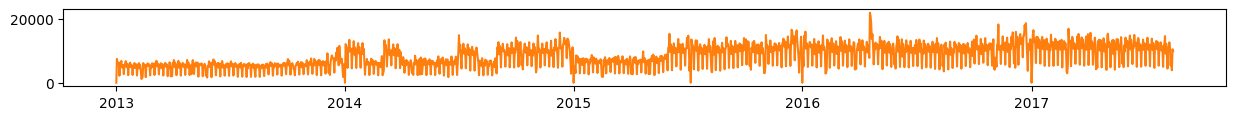

store_number:  10


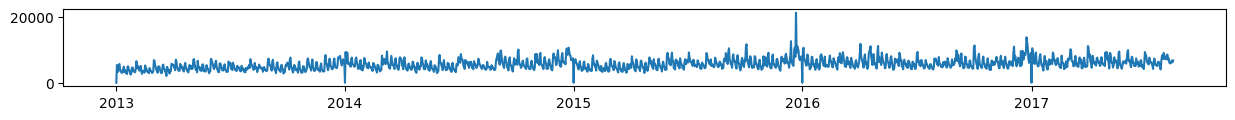

store_number:  11


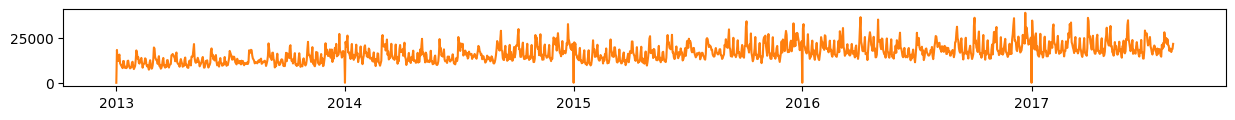

store_number:  12


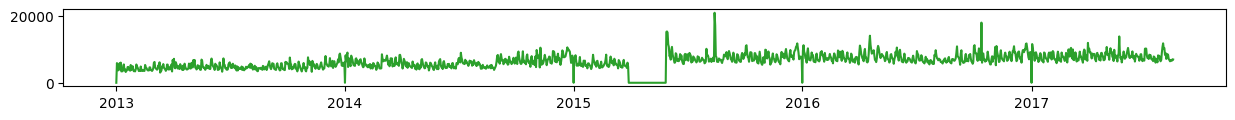

store_number:  13


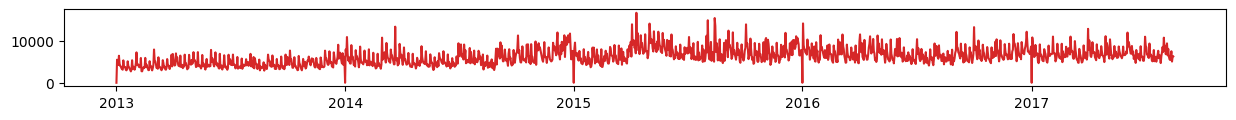

store_number:  14


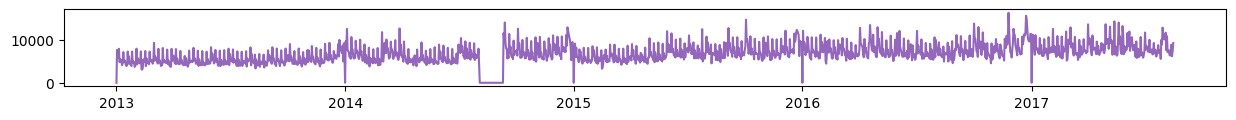

store_number:  15


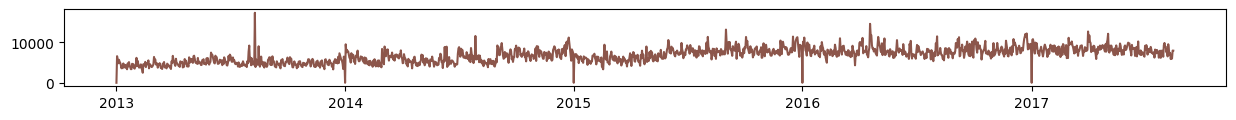

store_number:  16


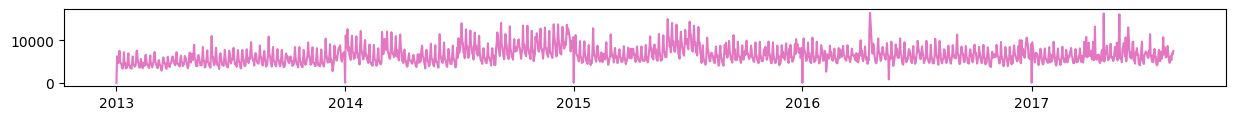

store_number:  17


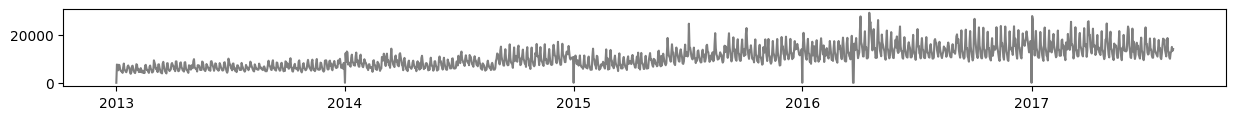

store_number:  18


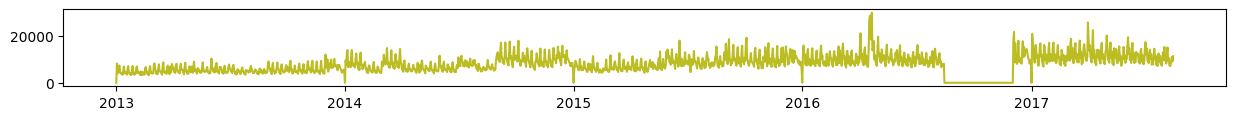

store_number:  19


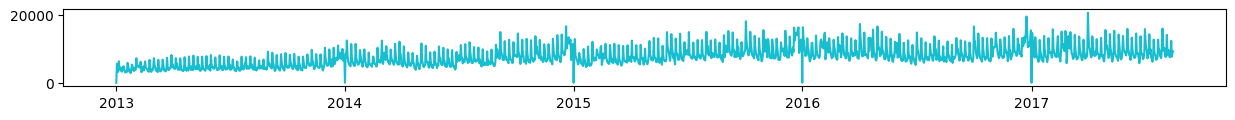

store_number:  2


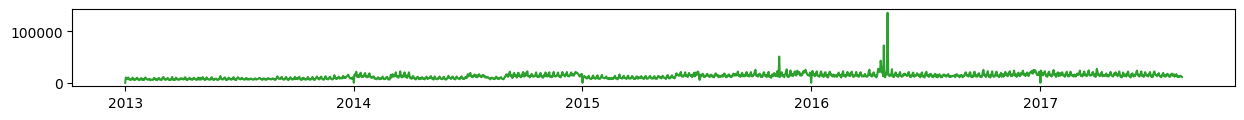

store_number:  20


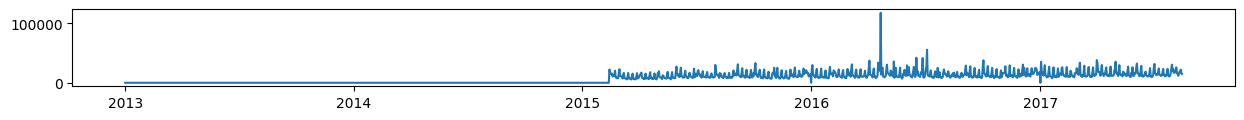

store_number:  21


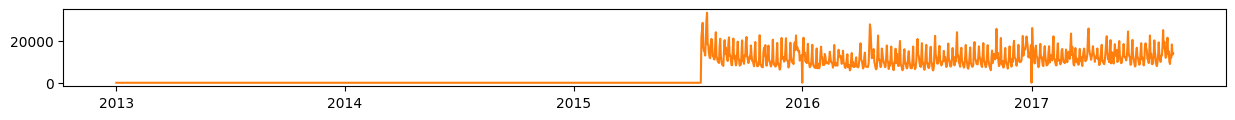

store_number:  22


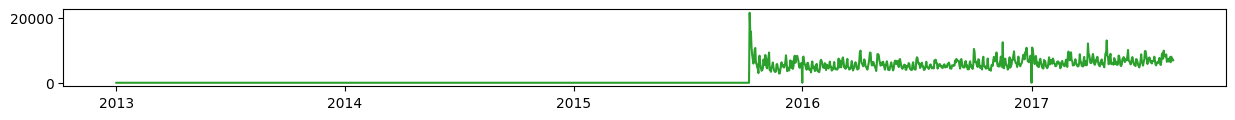

store_number:  23


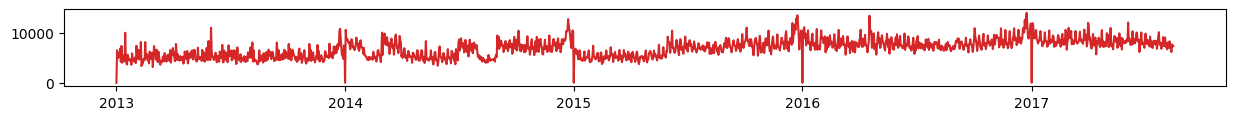

store_number:  24


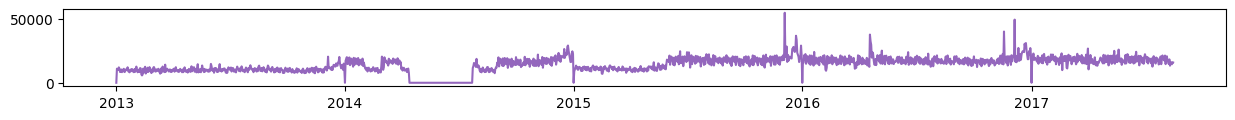

store_number:  25


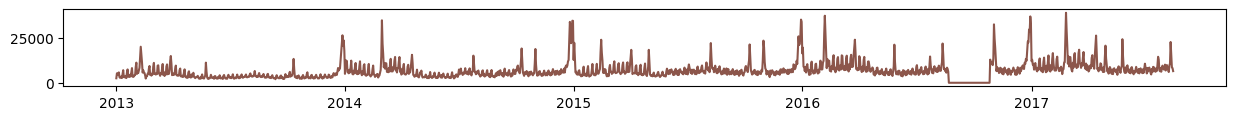

store_number:  26


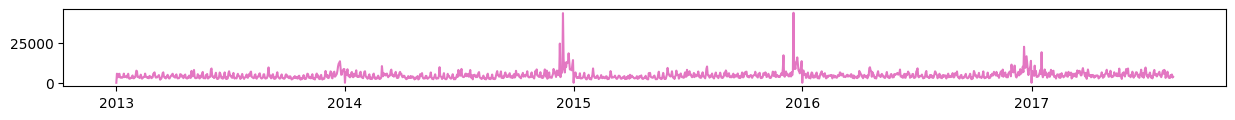

store_number:  27


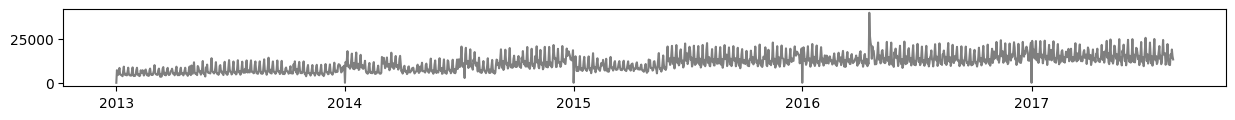

store_number:  28


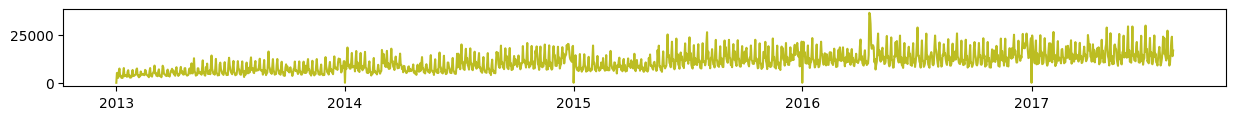

store_number:  29


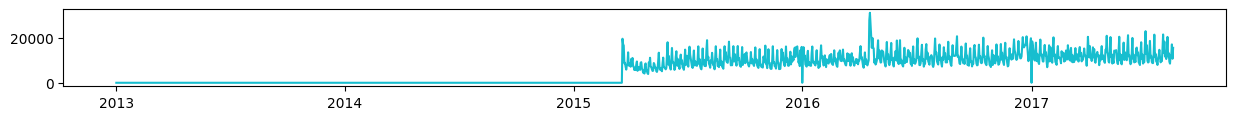

store_number:  3


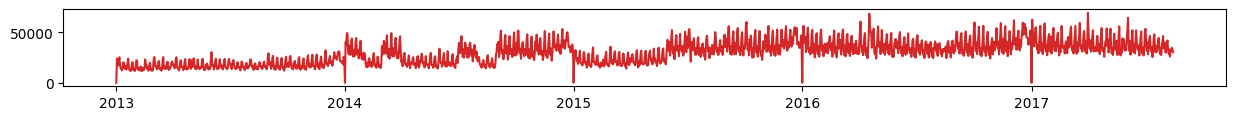

store_number:  30


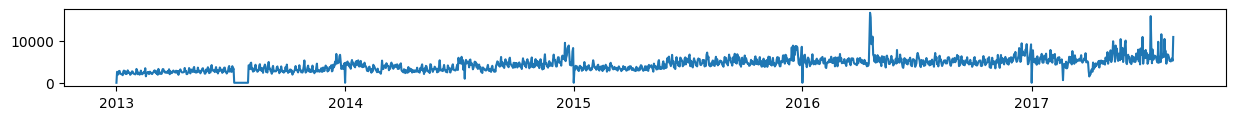

store_number:  31


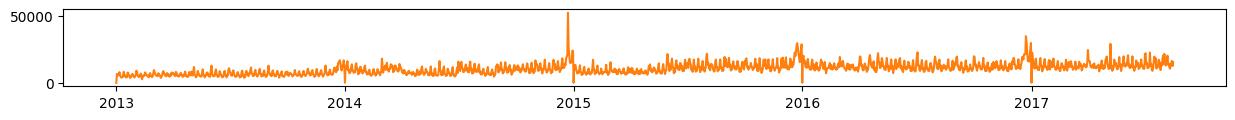

store_number:  32


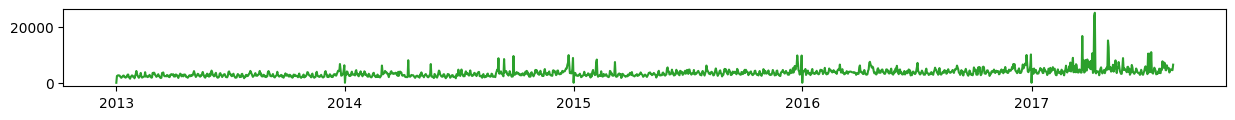

store_number:  33


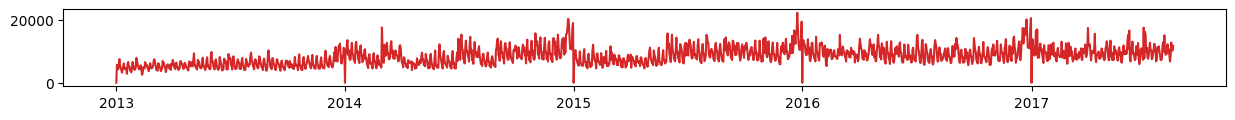

store_number:  34


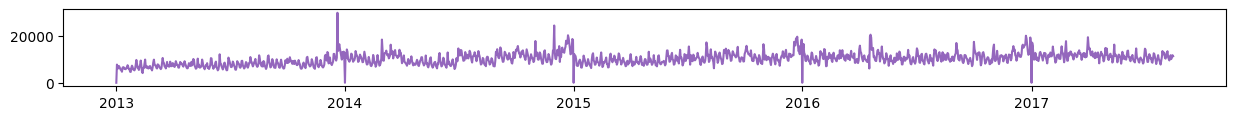

store_number:  35


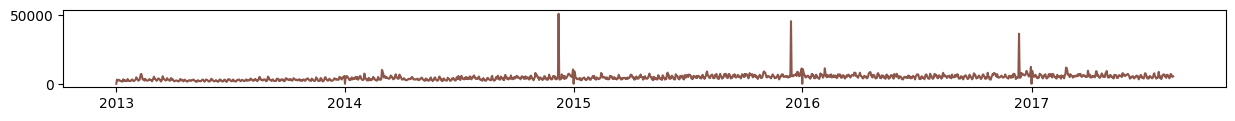

store_number:  36


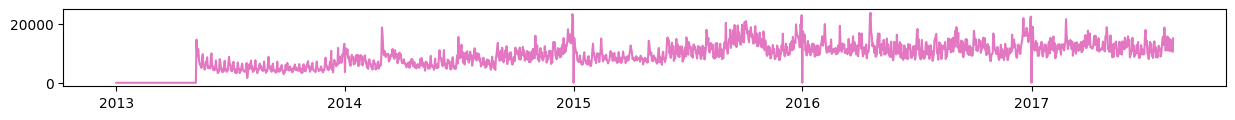

store_number:  37


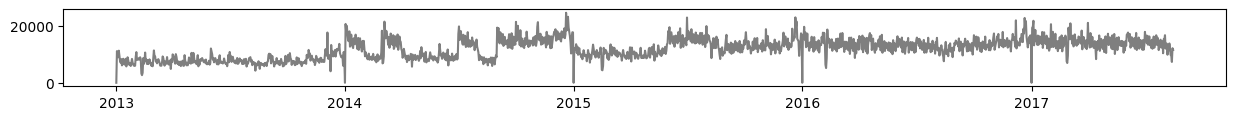

store_number:  38


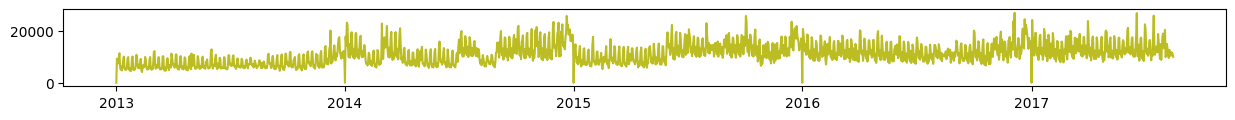

store_number:  39


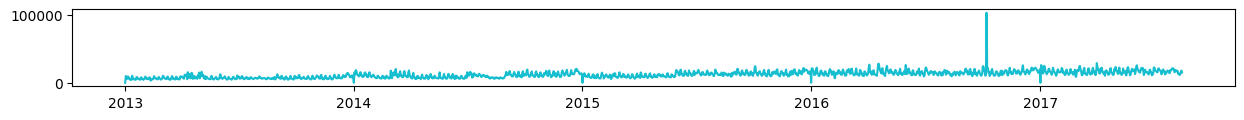

store_number:  4


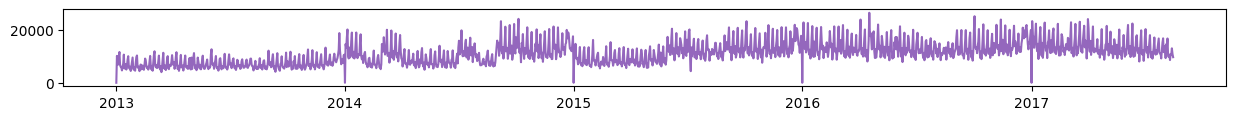

store_number:  40


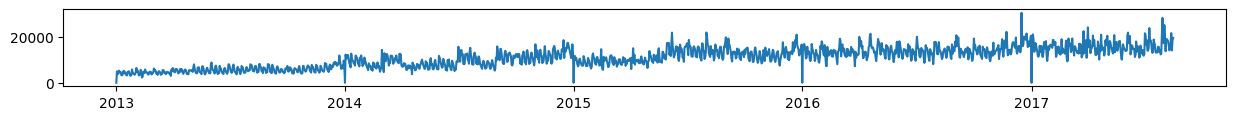

store_number:  41


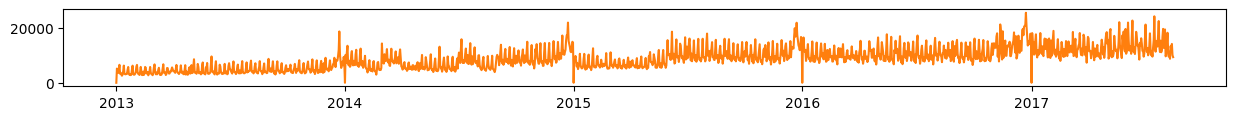

store_number:  42


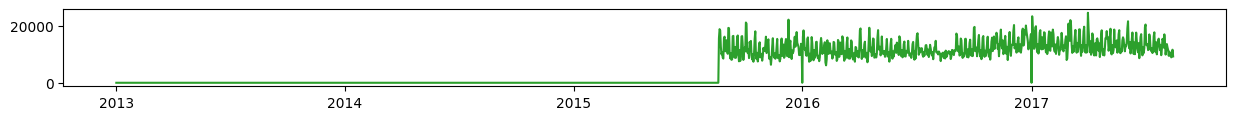

store_number:  43


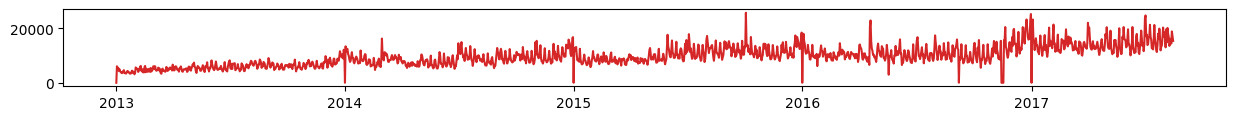

store_number:  44


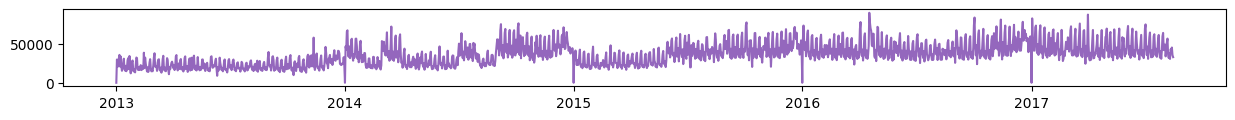

store_number:  45


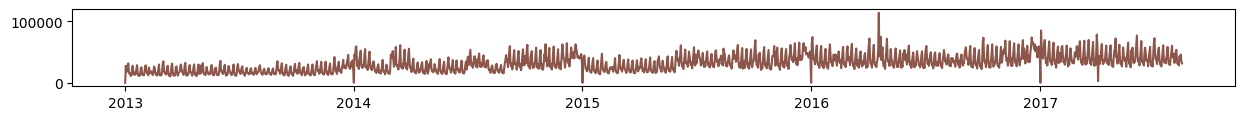

store_number:  46


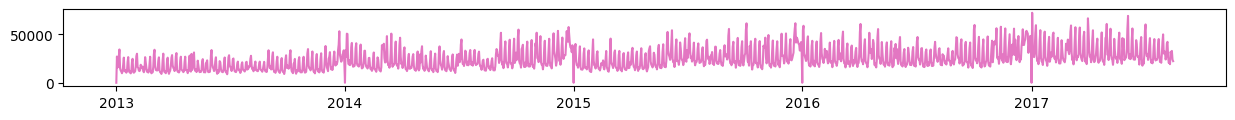

store_number:  47


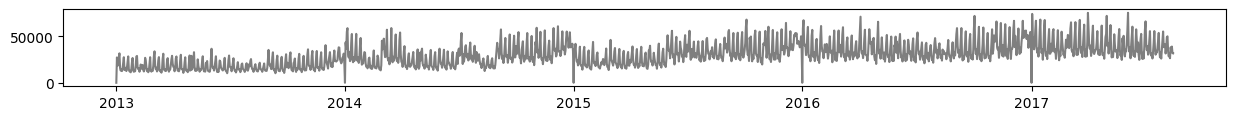

store_number:  48


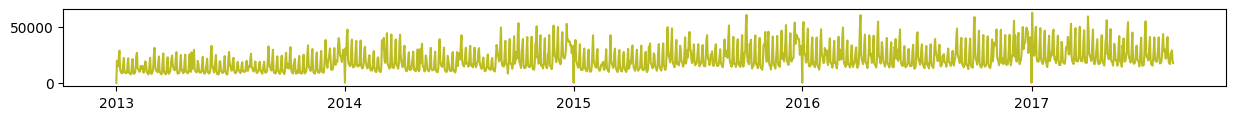

store_number:  49


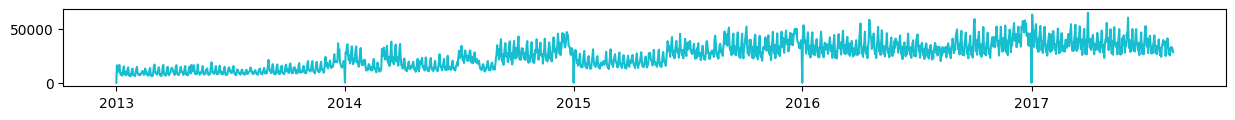

store_number:  5


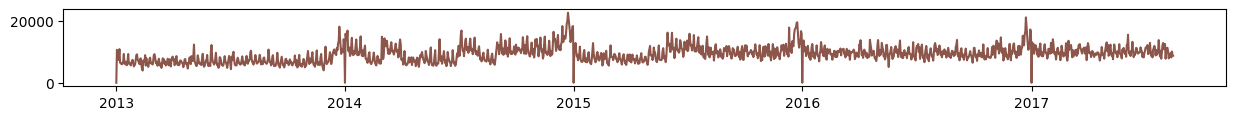

store_number:  50


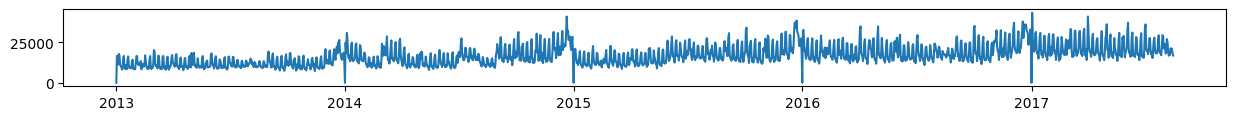

store_number:  51


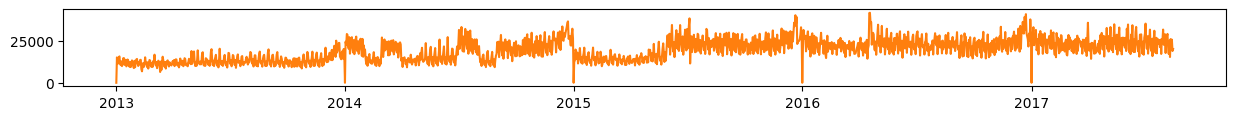

store_number:  52


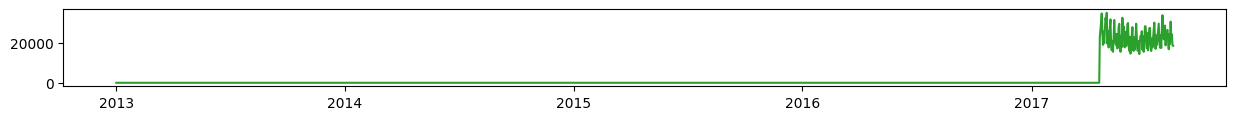

store_number:  53


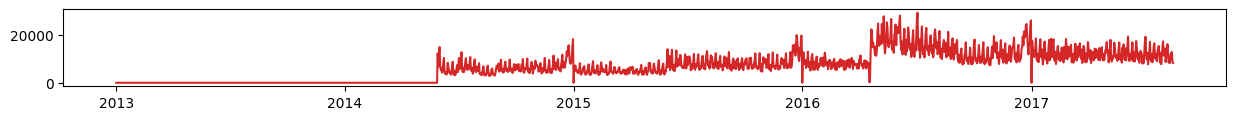

store_number:  54


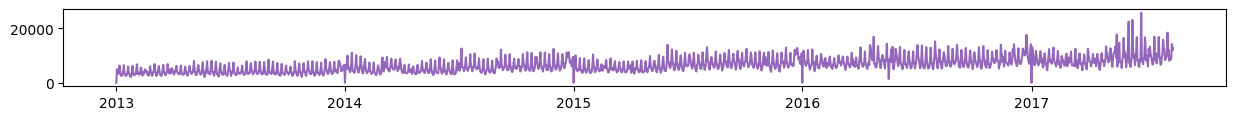

store_number:  6


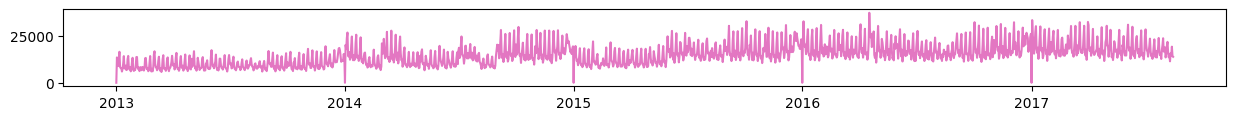

store_number:  7


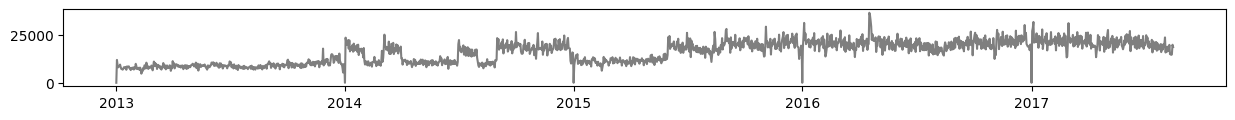

store_number:  8


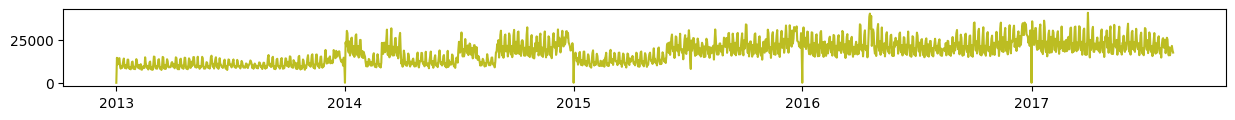

store_number:  9


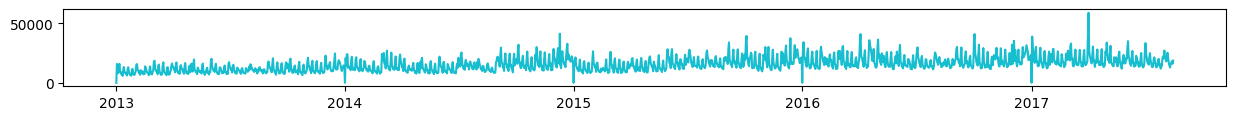

In [13]:
for store in stores:
  tmp_df = train_df[train_df['store_nbr']==store][['date','agg_sales']].drop_duplicates()
  print('store_number: ', store)
  plt.figure(figsize=(15,1))
  plt.plot(tmp_df['date'], tmp_df['agg_sales'], 'C'+str(store))
  plt.show()

store_number:  1


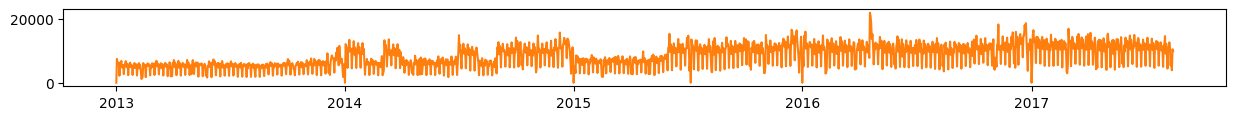

store_number:  10


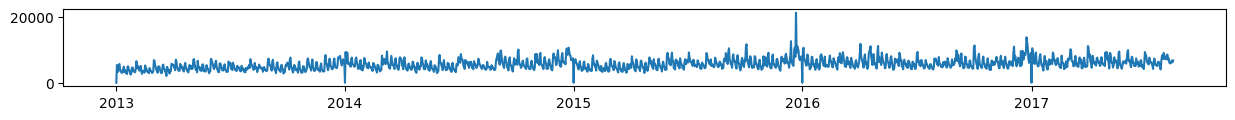

store_number:  11


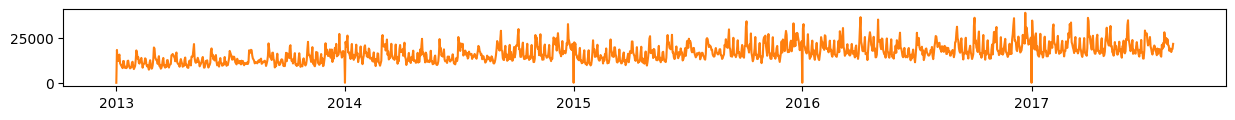

store_number:  12


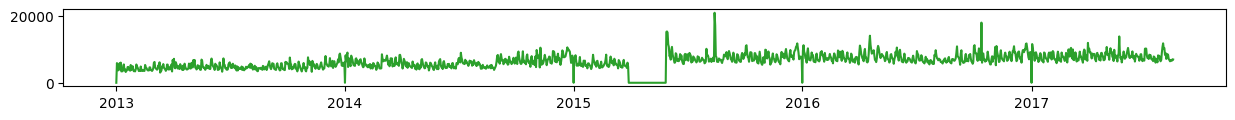

store_number:  13


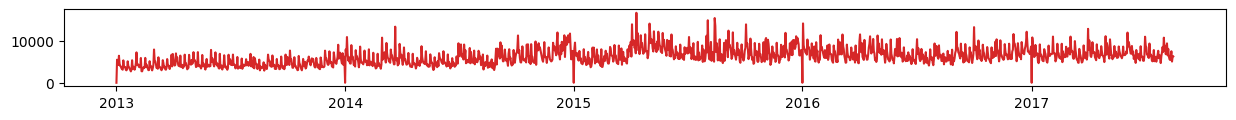

store_number:  14


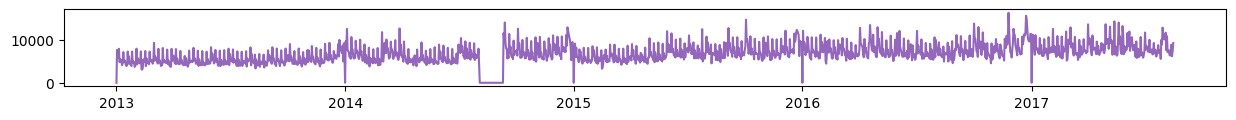

store_number:  15


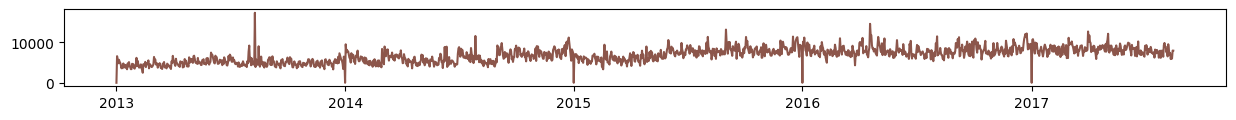

store_number:  16


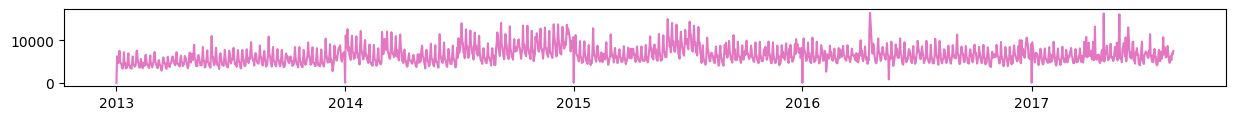

store_number:  17


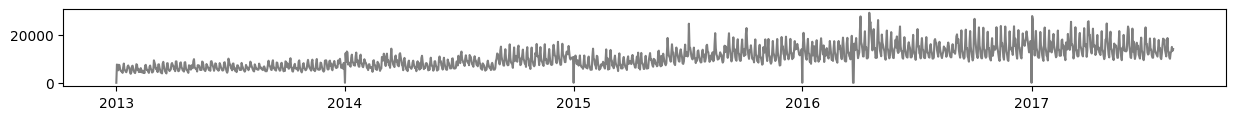

store_number:  18


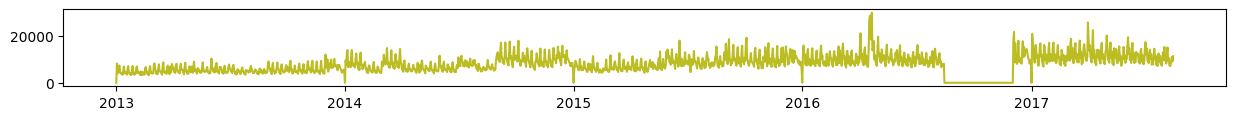

store_number:  19


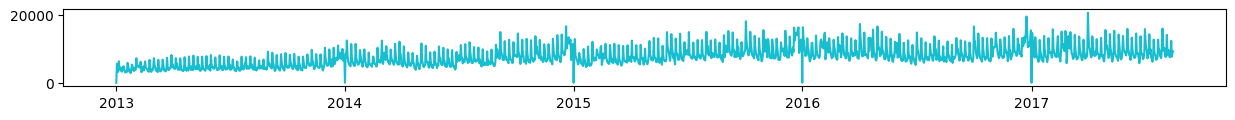

store_number:  2


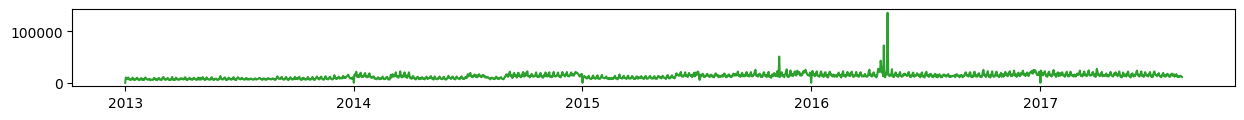

store_number:  20


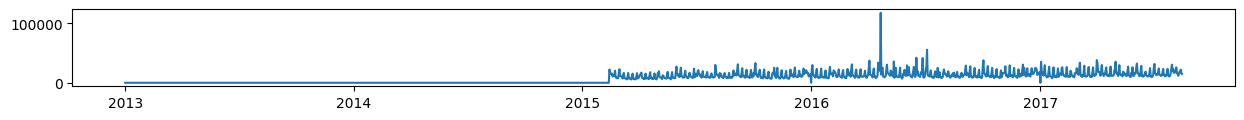

store_number:  21


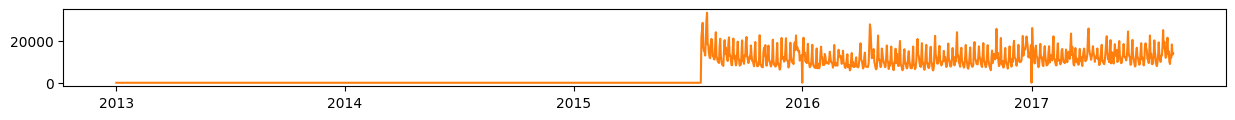

store_number:  22


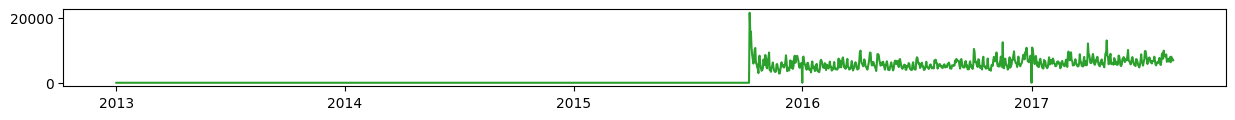

store_number:  23


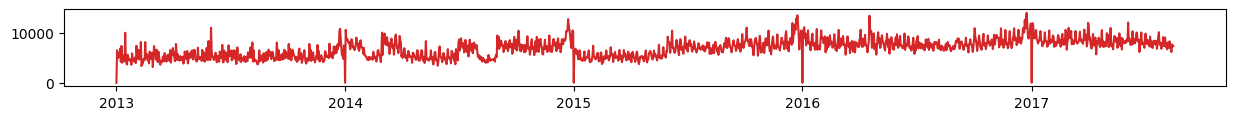

store_number:  24


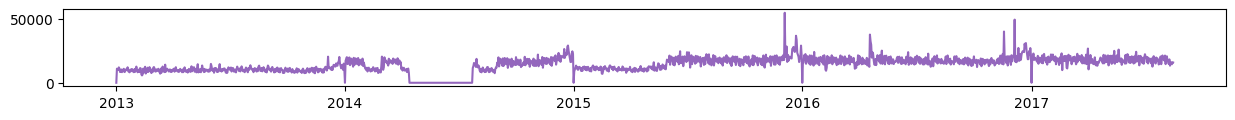

store_number:  25


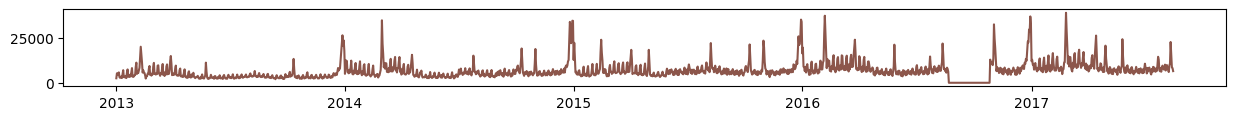

store_number:  26


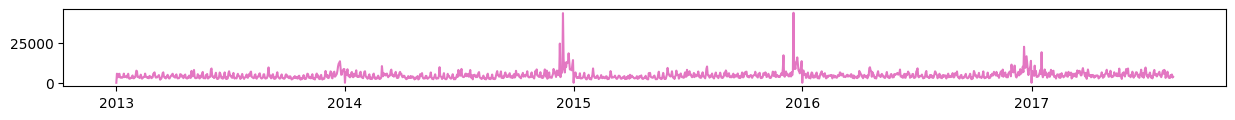

store_number:  27


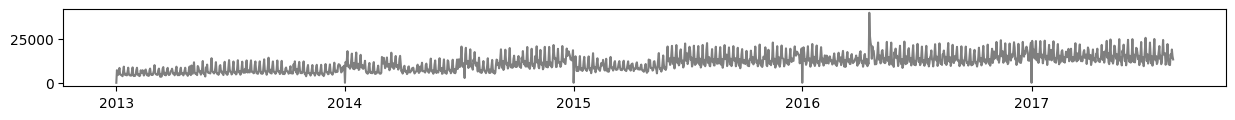

store_number:  28


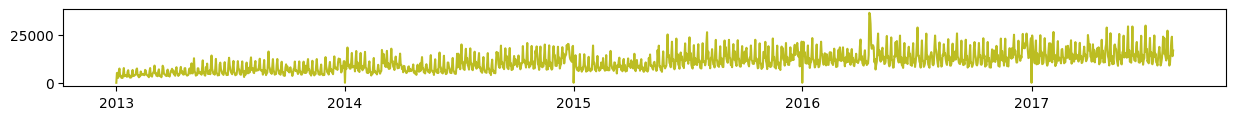

store_number:  29


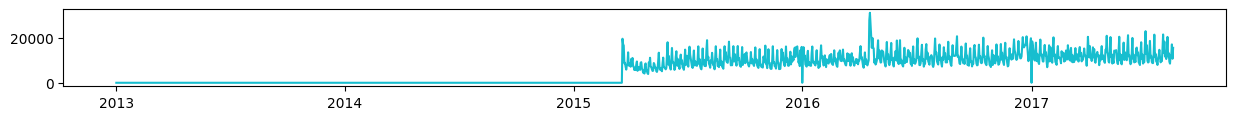

store_number:  3


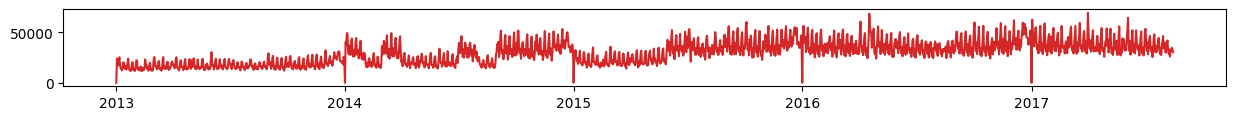

store_number:  30


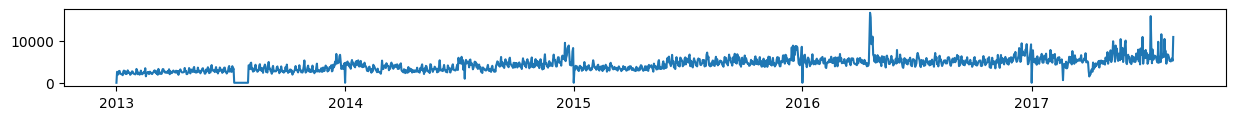

store_number:  31


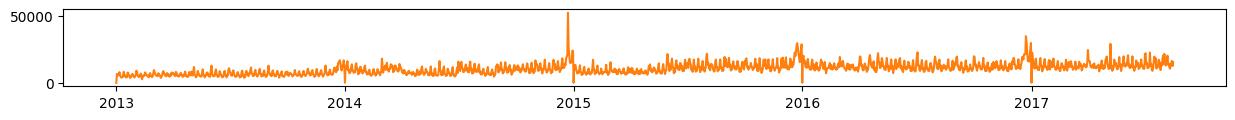

store_number:  32


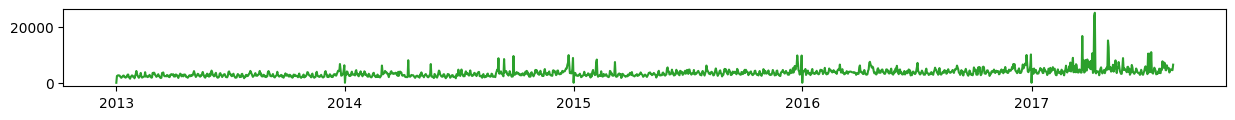

store_number:  33


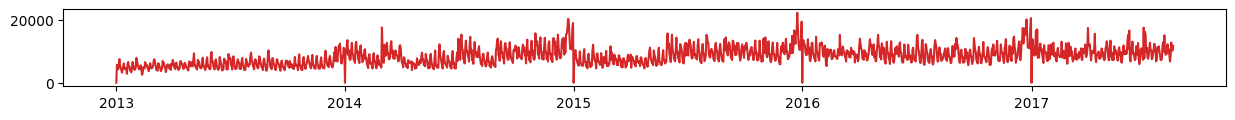

store_number:  34


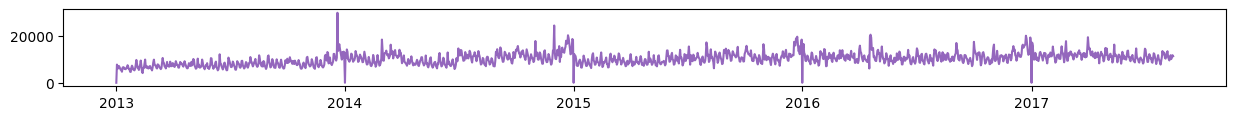

store_number:  35


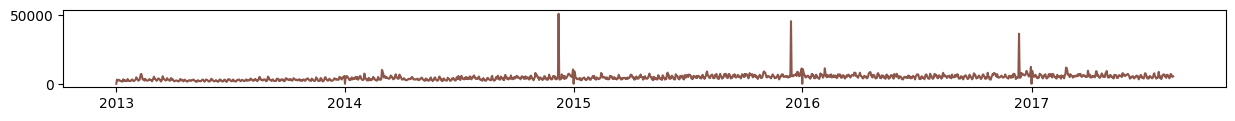

store_number:  36


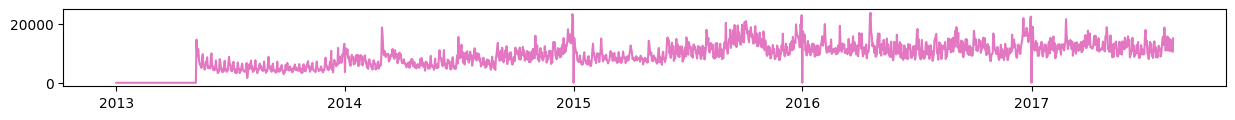

store_number:  37


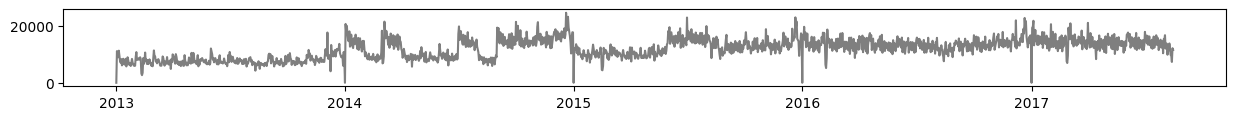

store_number:  38


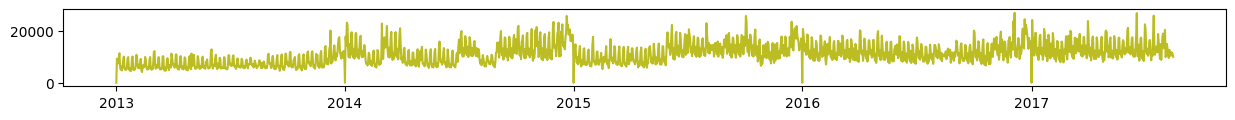

store_number:  39


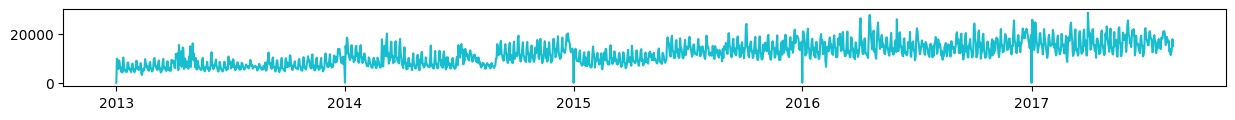

store_number:  4


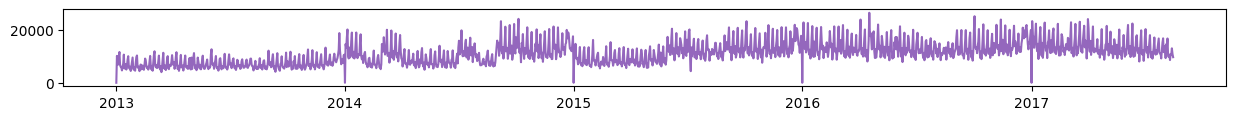

store_number:  40


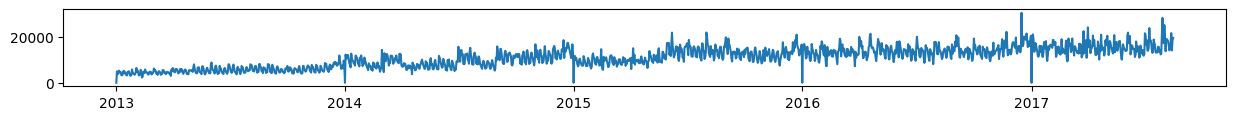

store_number:  41


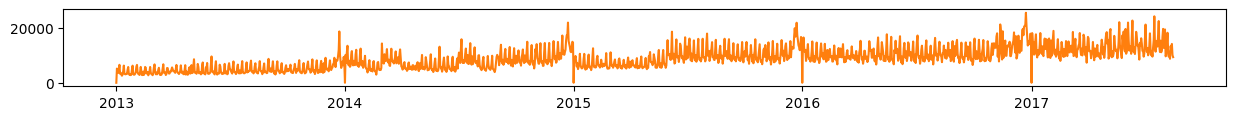

store_number:  42


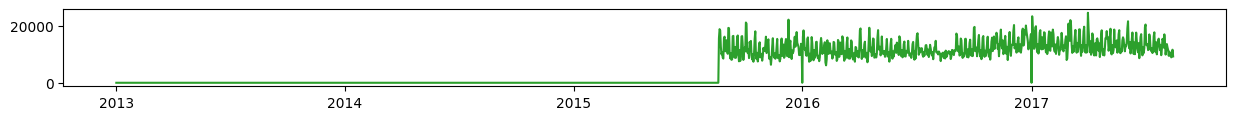

store_number:  43


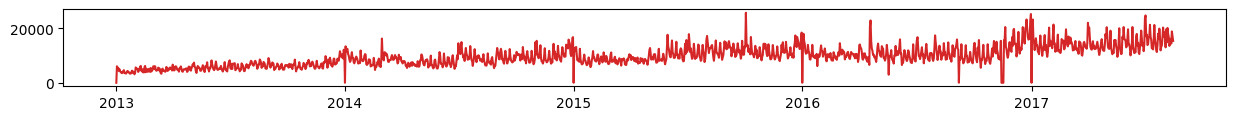

store_number:  44


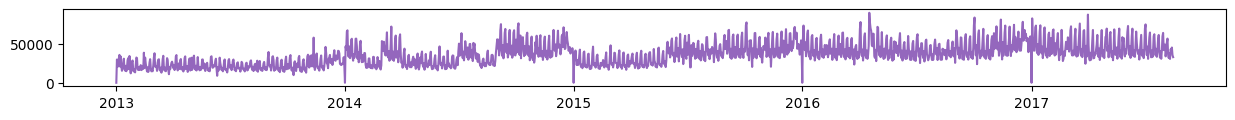

store_number:  45


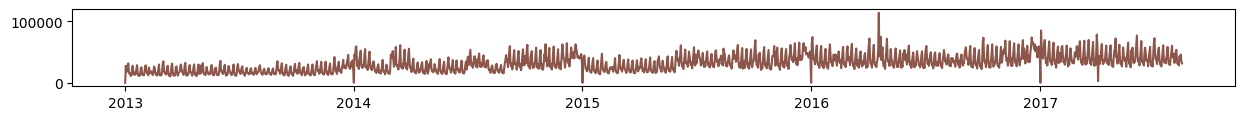

store_number:  46


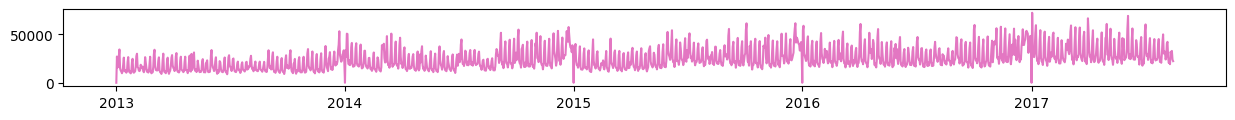

store_number:  47


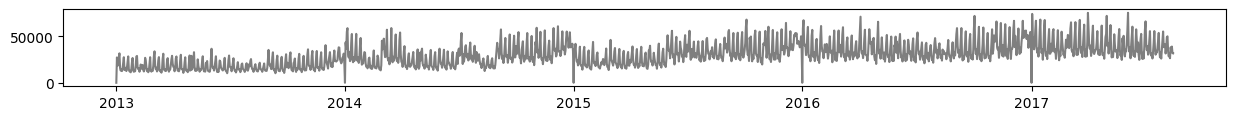

store_number:  48


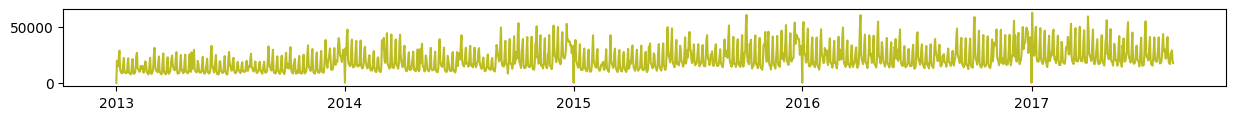

store_number:  49


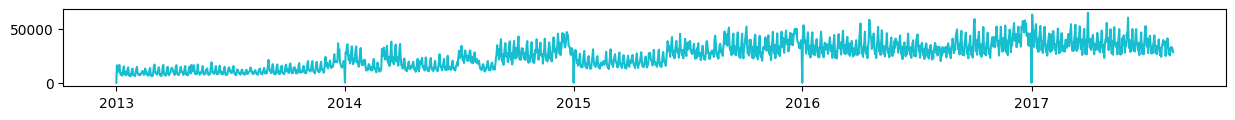

store_number:  5


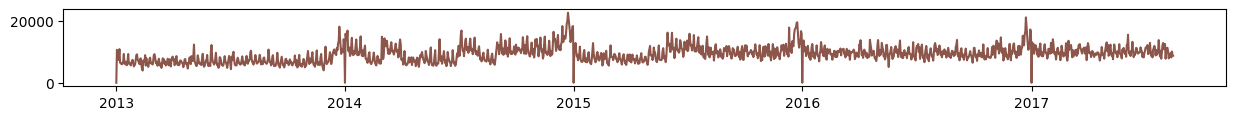

store_number:  50


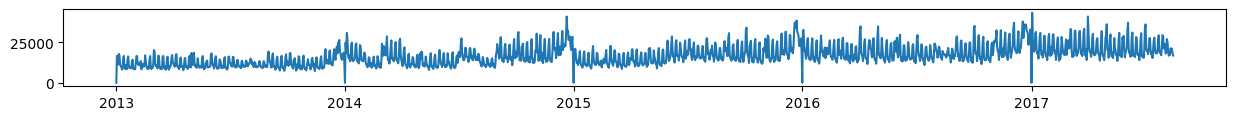

store_number:  51


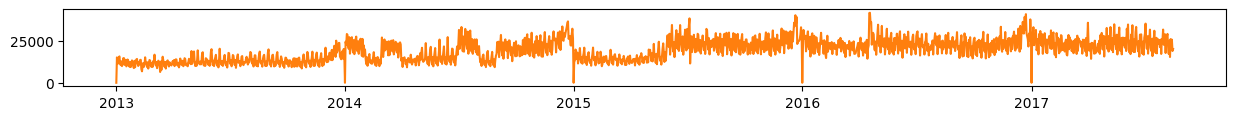

store_number:  52


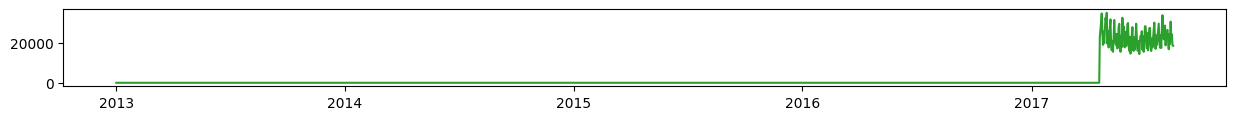

store_number:  53


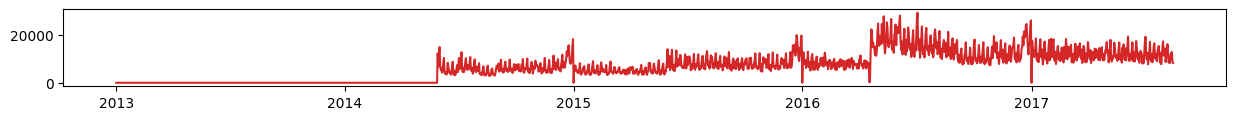

store_number:  54


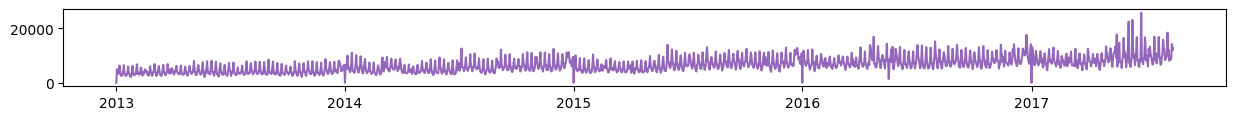

store_number:  6


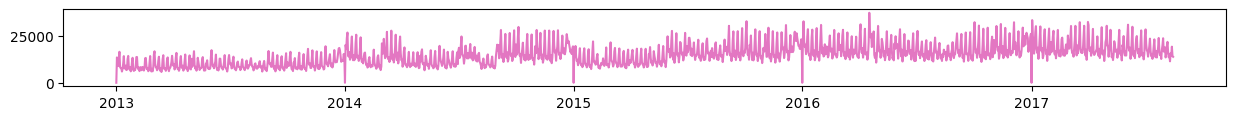

store_number:  7


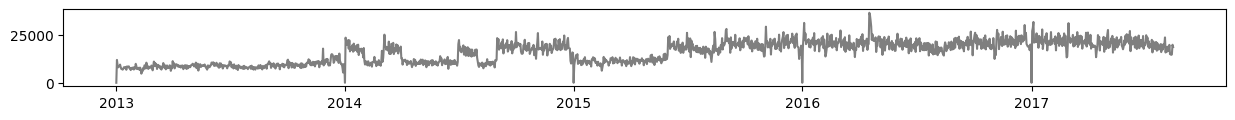

store_number:  8


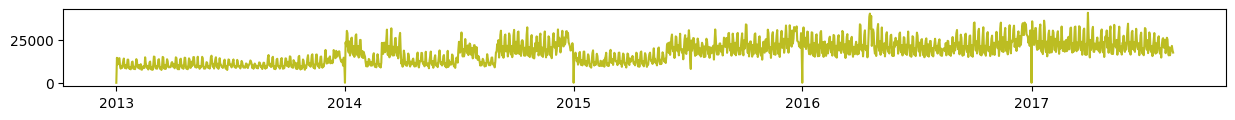

store_number:  9


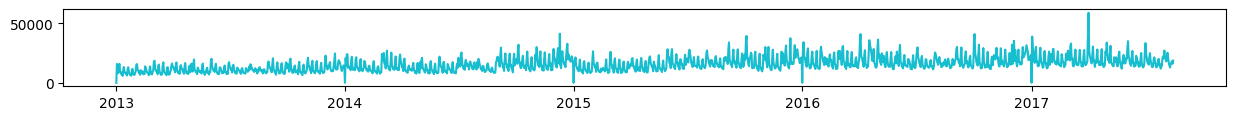

In [14]:
for store in stores:

  tmp_df = train_df[train_df['store_nbr']==store][['date','agg_sales']].drop_duplicates()

  if store == 39:

        avg = tmp_df['agg_sales'].mean()

        tmp_df['agg_sales'] = tmp_df['agg_sales'].apply(lambda x: x if x <= 40000 else avg)

  print('store_number: ', store)

  plt.figure(figsize=(15,1))

  plt.plot(tmp_df['date'], tmp_df['agg_sales'], 'C'+str(store))

  plt.show()

In [15]:
train_df['family_prod_agg'] = train_df[['date', 'family', 'sales']].groupby(['date', 'family']).transform('sum')

In [16]:
train_df.tail(20)

id       date  store_nbr                      family     sales  \
3000868  3000868 2017-08-15          9                  GROCERY II     9.000   
3000869  3000869 2017-08-15          9                    HARDWARE     1.000   
3000870  3000870 2017-08-15          9          HOME AND KITCHEN I    64.000   
3000871  3000871 2017-08-15          9         HOME AND KITCHEN II    61.000   
3000872  3000872 2017-08-15          9             HOME APPLIANCES     0.000   
3000873  3000873 2017-08-15          9                   HOME CARE   373.000   
3000874  3000874 2017-08-15          9                  LADIESWEAR    10.000   
3000875  3000875 2017-08-15          9             LAWN AND GARDEN    11.000   
3000876  3000876 2017-08-15          9                    LINGERIE     6.000   
3000877  3000877 2017-08-15          9            LIQUOR,WINE,BEER    25.000   
3000878  3000878 2017-08-15          9                   MAGAZINES    11.000   
3000879  3000879 2017-08-15          9                       MEATS   449.228   
3000880  3000880 2017-08-15          9               PERSONAL CARE   522.000   
3000881  3000881 2017-08-15          9                PET SUPPLIES     6.000   
3000882  3000882 2017-08-15          9     PLAYERS AND ELECTRONICS     6.000   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  agg_sales  family_prod_agg  
3000868            0  18636.477      1300.000000  
3000869            0  18636.477        57.000000  
3000870            0  18636.477      1669.000000  
3000871            2  18636.477      1448.000000  
3000872            0  18636.477         3.000000  
3000873            6  18636.477     13644.000000  
3000874            0  18636.477       503.000000  
3000875            3  18636.477       679.000000  
3000876            0  18636.477       458.000000  
3000877            2  18636.477      3461.000000  
3000878            0  18636.477       461.000000  
3000879            0  18636.477     17928.170944  
3000880           11  18636.477     14787.000000  
3000881            0  18636.477       364.000000  
3000882            0  18636.477       592.000000  
3000883            0  18636.477     17586.709986  
3000884            1  18636.477      4641.522980  
3000885          148  18636.477    125108.971000  
3000886            8  18636.477      2530.000000  
3000887            0  18636.477       970.177005

In [17]:
family_prod= train_df['family'].drop_duplicates().values

In [18]:
family_prod

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [19]:
type(family_prod)

numpy.ndarray

In [20]:
len(family_prod)

33

family product name:  AUTOMOTIVE


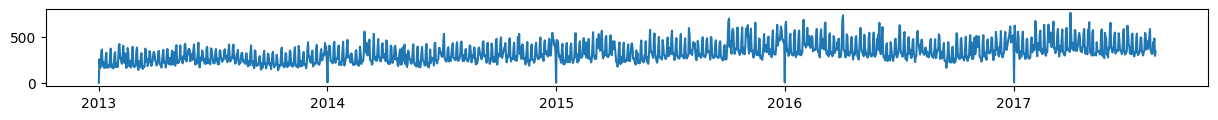

family product name:  BABY CARE


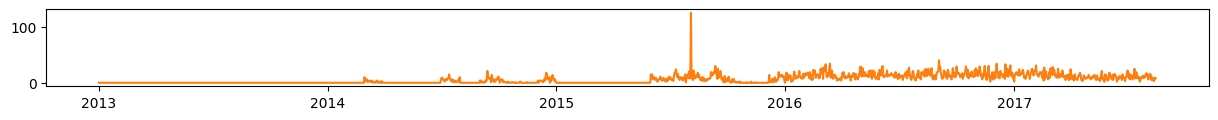

family product name:  BEAUTY


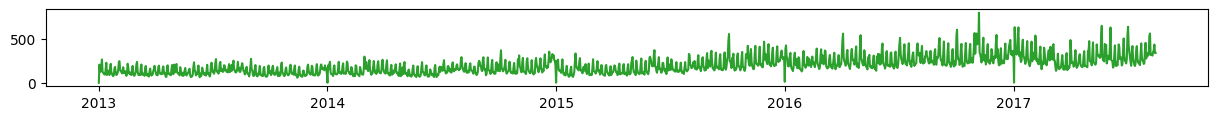

family product name:  BEVERAGES


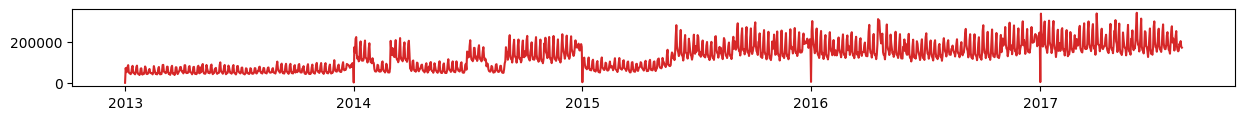

family product name:  BOOKS


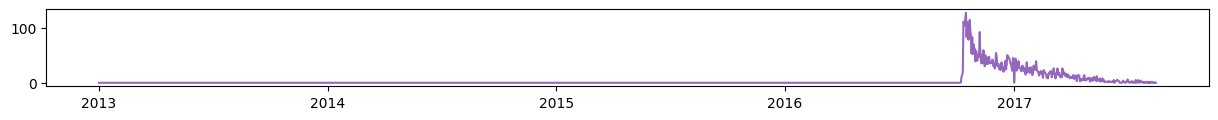

family product name:  BREAD/BAKERY


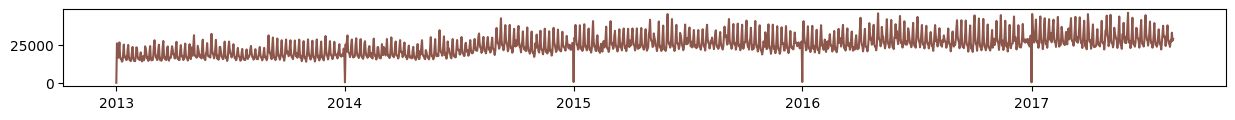

family product name:  CELEBRATION


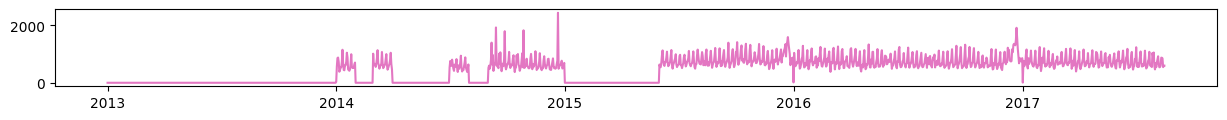

family product name:  CLEANING


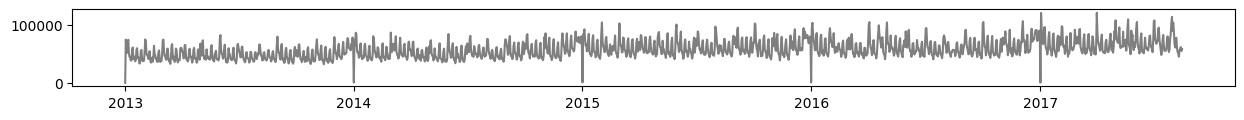

family product name:  DAIRY


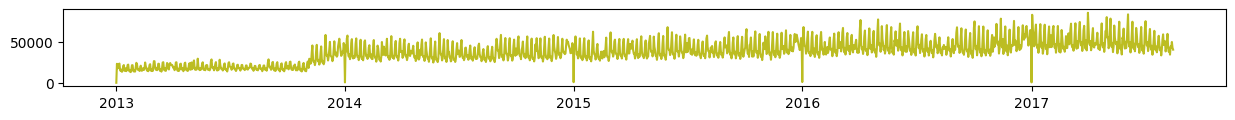

family product name:  DELI


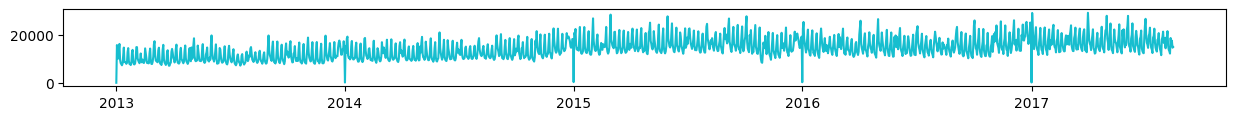

family product name:  EGGS


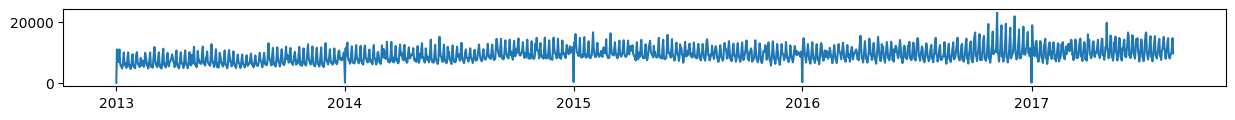

family product name:  FROZEN FOODS


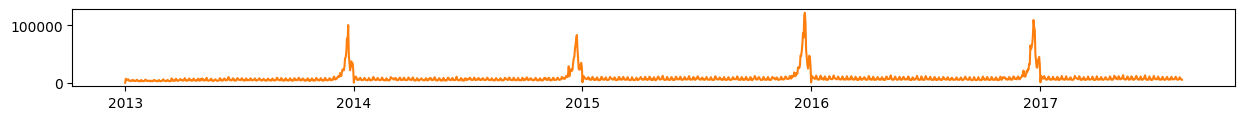

family product name:  GROCERY I


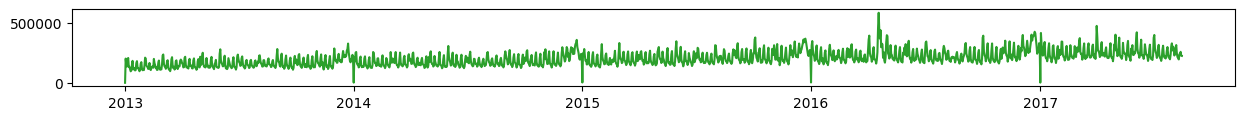

family product name:  GROCERY II


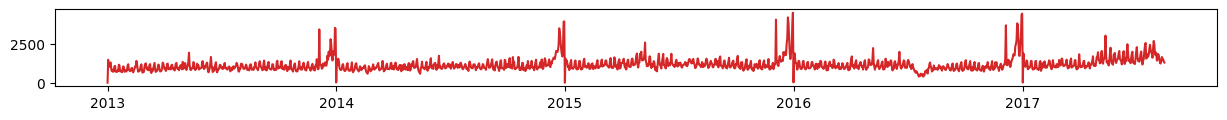

family product name:  HARDWARE


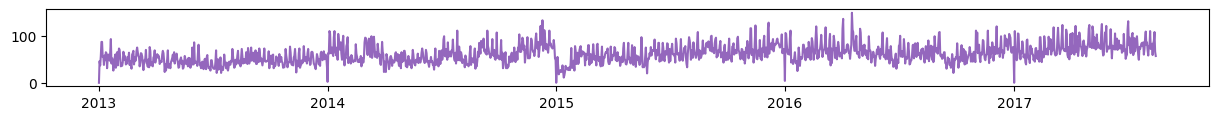

family product name:  HOME AND KITCHEN I


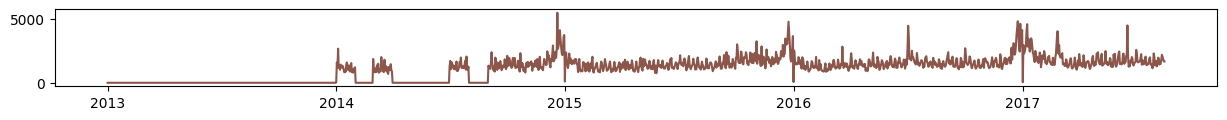

family product name:  HOME AND KITCHEN II


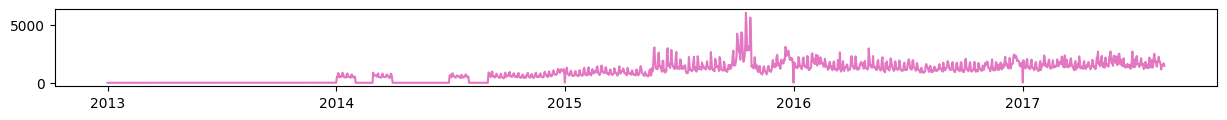

family product name:  HOME APPLIANCES


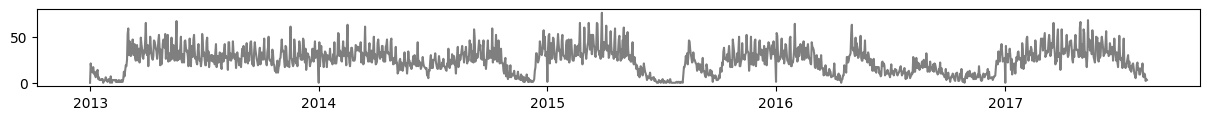

family product name:  HOME CARE


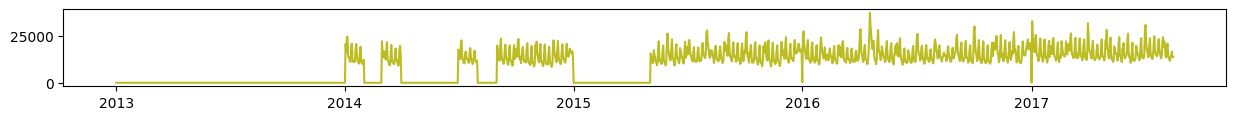

family product name:  LADIESWEAR


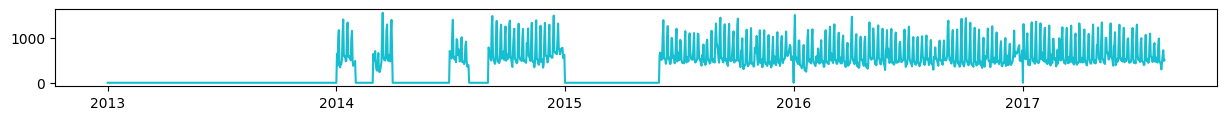

family product name:  LAWN AND GARDEN


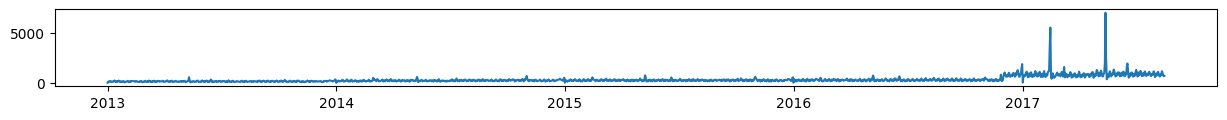

family product name:  LINGERIE


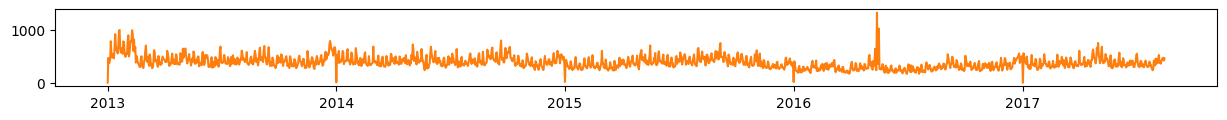

family product name:  LIQUOR,WINE,BEER


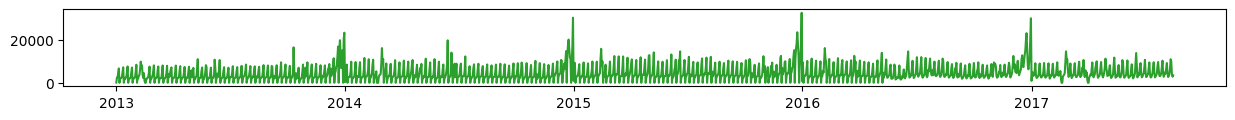

family product name:  MAGAZINES


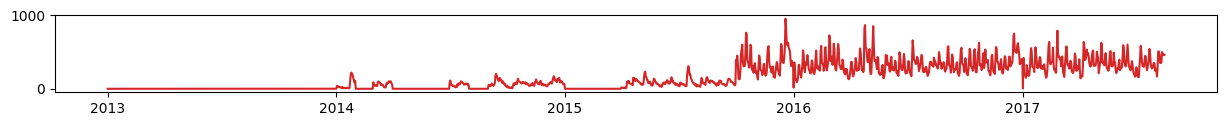

family product name:  MEATS


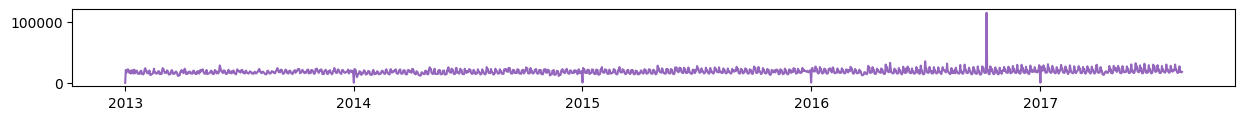

family product name:  PERSONAL CARE


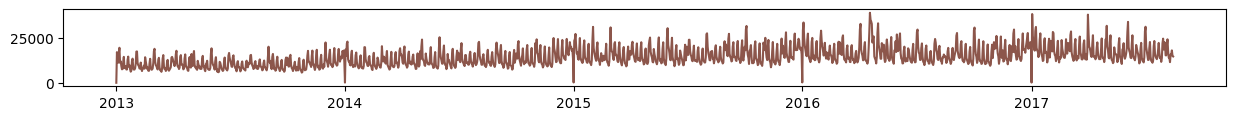

family product name:  PET SUPPLIES


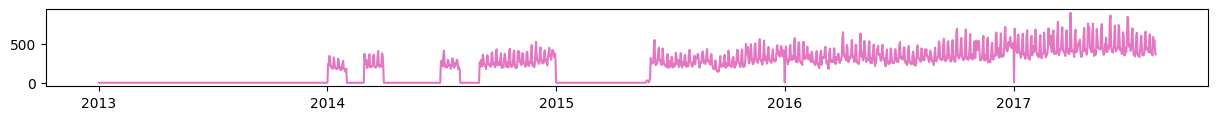

family product name:  PLAYERS AND ELECTRONICS


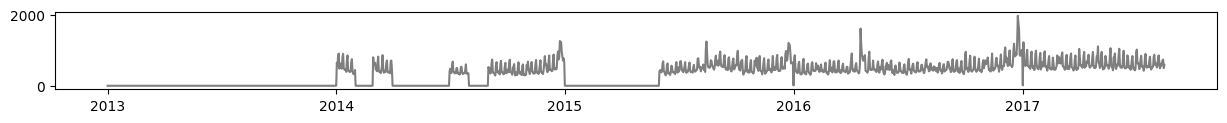

family product name:  POULTRY


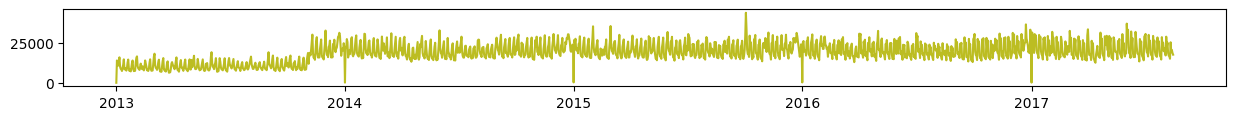

family product name:  PREPARED FOODS


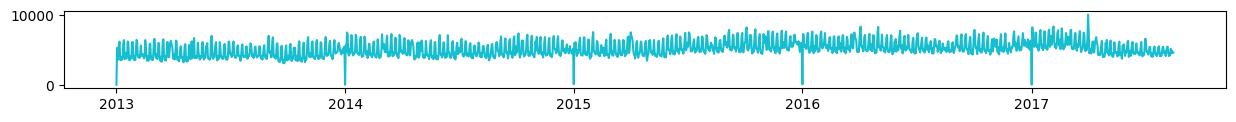

family product name:  PRODUCE


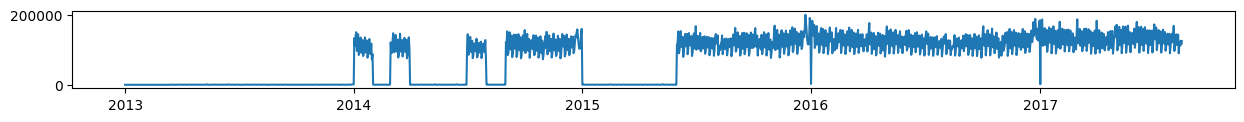

family product name:  SCHOOL AND OFFICE SUPPLIES


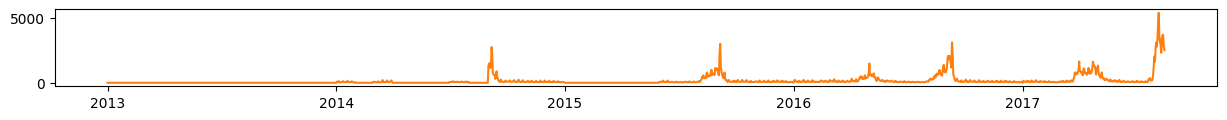

family product name:  SEAFOOD


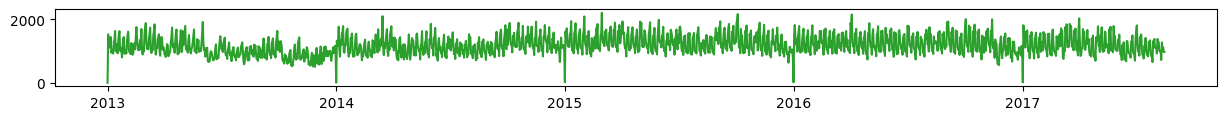

In [21]:
count = 0
for family in family_prod:
  tmp2_df = train_df[train_df['family']==family][['date', 'family_prod_agg']].drop_duplicates()
  print('family product name: ', family)
  plt.figure(figsize=(15, 1))
  plt.plot(tmp2_df['date'], tmp2_df['family_prod_agg'], 'C'+str(count))
  plt.show()
  count = count + 1